# Packages

In [7]:
import os
import itertools
import numpy as np
import math as math
import pandas as pd 
import random as random
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon
from utils.Auxiliary import *

# Input


In [8]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData025 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.025)


# Shape

In [9]:
print(AnalyzedData015["Error_DUREAL"].shape)
print(AnalyzedData025["Error_DUREAL"].shape)

(100, 448)
(98, 448)


# Run Time

In [4]:
### Time ###
print("RF Time (minutes): " + "Mean: " + str(round(np.mean(RandomForesResults["Time_RF"])/60,2)) + "| Max: " + str(round(np.max(RandomForesResults["Time_RF"])/60,2)))
print("DUREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)))
print("UNREAL 0.015 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)))
print("DUREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_DUREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_DUREAL"])/60,2)))
print("UNREAL 0.025 Time (minutes): " + "Mean: " + str(round(np.mean(AnalyzedData025["Time_UNREAL"])/60,2)) + "| Max: " + str(round(np.max(AnalyzedData025["Time_UNREAL"])/60,2)))

RF Time (minutes): Mean: 1.69| Max: 1.97
DUREAL 0.015 Time (minutes): Mean: 49.47| Max: 174.55
UNREAL 0.015 Time (minutes): Mean: 48.07| Max: 175.76
DUREAL 0.025 Time (minutes): Mean: 775.1| Max: 1839.49
UNREAL 0.025 Time (minutes): Mean: 752.04| Max: 1828.79


# Error Vec

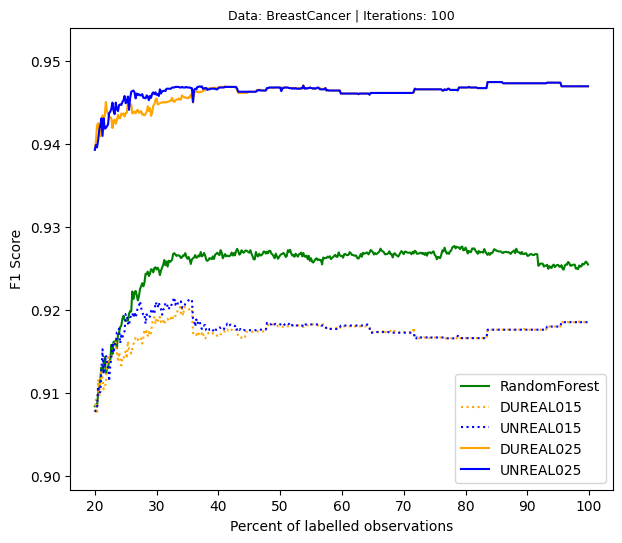

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData015['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL025": "orange",
    "UNREAL025": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL005": "solid",
    "UNREAL005": "solid",
    "DUREAL025": "solid",
    "UNREAL025": "solid"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL025 = AnalyzedData025["Error_DUREAL"],
                 UNREAL025 = AnalyzedData025["Error_UNREAL"],
                 Colors = colors,
                 Linestyles=linestyles,
                # xlim = [20,40],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Selection History

In [6]:
# SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
# SelectionHistoryRank_UNREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_UNREAL"], DataType = DataType)
# SelectionHistoryRank_DUREAL15 = SelectionHistoryRankFunction(AnalyzedData015["SelectionHistory_DUREAL"], DataType = DataType)
# SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_UNREAL15.sort_values(by = "AverageRank").head()
# SelectionHistoryRank_DUREAL15.sort_values(by = "AverageRank").head()

# Tree Counts

## Set Up

In [7]:
UNREAL_Average_TreeCountsRatio015 = np.mean(AnalyzedData015["TreeCounts_UNREAL"].div(AnalyzedData015["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatio015 = np.mean(AnalyzedData015["TreeCounts_DUREAL"].div(AnalyzedData015["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatio015 = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatio015, 
                              DUREAL_Average_TreeCountsRatio015,
                              np.round(UNREAL_Average_TreeCountsRatio015 - DUREAL_Average_TreeCountsRatio015,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatio025 = np.mean(AnalyzedData025["TreeCounts_UNREAL"].div(AnalyzedData025["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatio025 = np.mean(AnalyzedData025["TreeCounts_DUREAL"].div(AnalyzedData025["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatio025 = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatio025, 
                              DUREAL_Average_TreeCountsRatio025,
                              np.round(UNREAL_Average_TreeCountsRatio025 - DUREAL_Average_TreeCountsRatio025,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

## Number of All Trees

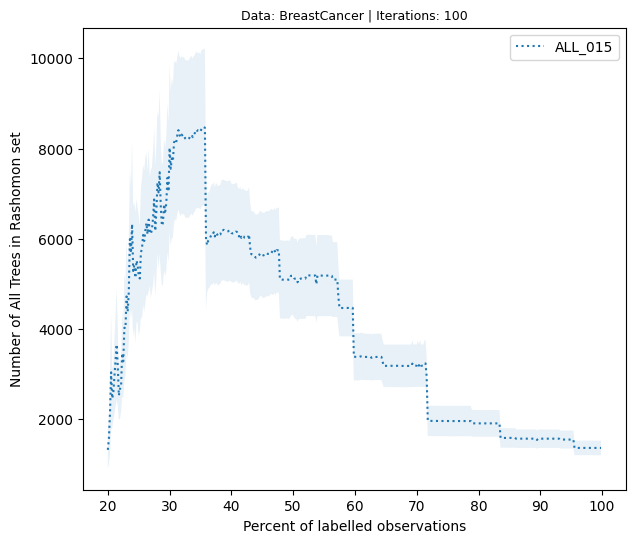

In [8]:
TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_015 = AnalyzedData015["TreeCounts_UNREAL"],
                 ALL_015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  Unique_025 = AnalyzedData025["TreeCounts_UNREAL"],
                #  ALL_025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                #  Ratio015 = AverageTreeCountRatio015,
                #  Ratio025 = AverageTreeCountRatio025,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)

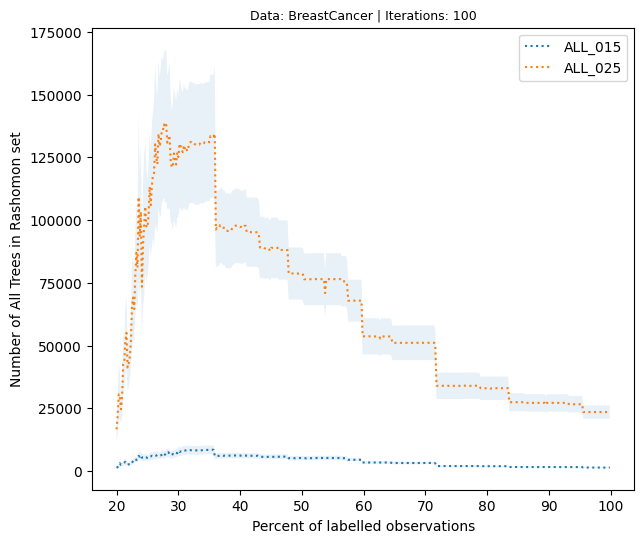

In [9]:

TreePlot = MeanVariancePlot(RelativeError = None,
                #  Unique_015 = AnalyzedData015["TreeCounts_UNREAL"],
                 ALL_015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  Unique_025 = AnalyzedData025["TreeCounts_UNREAL"],
                 ALL_025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                #  Ratio015 = AverageTreeCountRatio015,
                #  Ratio025 = AverageTreeCountRatio025,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees in Rashomon set",
                VarInput = False,
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)

## Number of Unique Trees

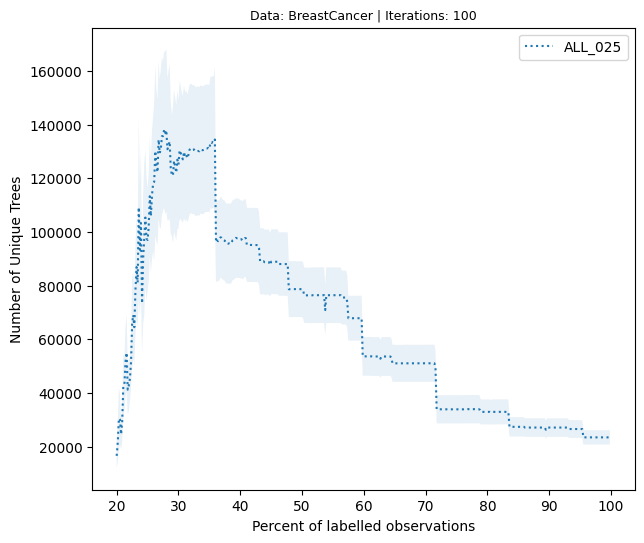

In [ ]:
TreeNumber = MeanVariancePlot(RelativeError = None,
                #  Unique_015 = AnalyzedData015["TreeCounts_UNREAL"],
                #  ALL_015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  Unique_025 = AnalyzedData025["TreeCounts_UNREAL"],
                 ALL_025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                #  Ratio015 = AverageTreeCountRatio015,
                #  Ratio025 = AverageTreeCountRatio025,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)

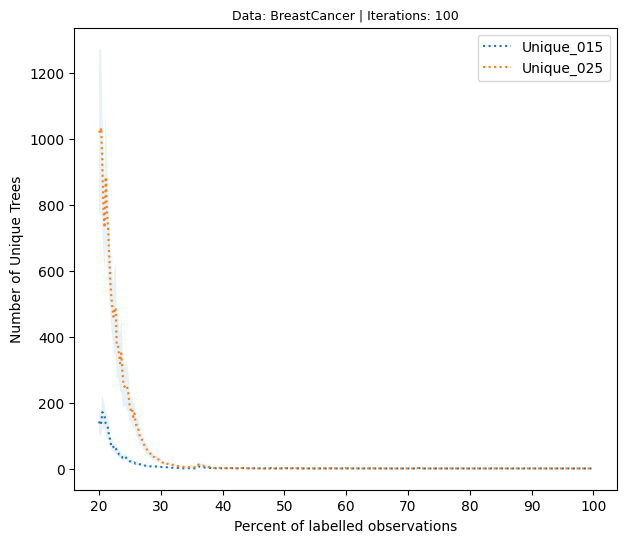

In [11]:

TreeNumber = MeanVariancePlot(RelativeError = None,
                 Unique_015 = AnalyzedData015["TreeCounts_UNREAL"],
                #  ALL_015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                 Unique_025 = AnalyzedData025["TreeCounts_UNREAL"],
                #  ALL_025 = AnalyzedData025["TreeCounts_ALL_UNREAL"],
                #  Ratio015 = AverageTreeCountRatio015,
                #  Ratio025 = AverageTreeCountRatio025,
                #  Colors = colors,
                #  Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.1,
                 CriticalValue = 1.96)